In [124]:
import pandas as pd 

In [125]:
df=pd.read_csv('data.csv')

In [126]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [127]:
# importing date class from datetime module
from datetime import date
  
# creating the date object of today's date
todays_date = date.today()
current_year= todays_date.year

In [128]:
current_year

2024

In [129]:
df['company_age'] = current_year-df['yr_of_estab']

In [130]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


In [131]:
df.drop('yr_of_estab', inplace=True, axis=1)

In [132]:
df.drop(columns=['case_id'],axis=1,inplace=True)

In [133]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,19


In [134]:
X=df.drop('case_status',axis=1)
y=df['case_status']

In [135]:
# If the target column has Denied it is encoded as 1 others as 0
y= np.where(y=='Denied', 1,0)

In [136]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [137]:
or_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
oh_columns = ['continent','unit_of_wage','region_of_employment']
numerical_cols=['no_of_employees','company_age']
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Numerical pipeline
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='median')),
        ("scaler", StandardScaler())
    ]
)

# Categorical pipeline
cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='most_frequent')),
        ("encoding", OneHotEncoder())
    ]
)

# Define the preprocessing for ordinal columns separately
ordinal_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='most_frequent')),
        ("ordinal_encoder", OrdinalEncoder())
    ]
)

# Combine all pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, numerical_cols),
        ("cat", cat_pipeline, oh_columns),
        ("ord", ordinal_pipeline, or_columns)
    ]
)



In [138]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,19


In [139]:
X = preprocessor.fit_transform(X)

In [142]:
X

array([[ 0.38666657, -0.65122993,  0.        , ...,  0.        ,
         1.        ,  2.        ],
       [-0.14228155, -0.53321103,  0.        , ...,  0.        ,
         1.        ,  3.        ],
       [ 1.69498375, -0.6748337 ,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.19871259,  1.63833662,  0.        , ...,  0.        ,
         0.        ,  3.        ],
       [-0.16387483,  2.18122353,  0.        , ...,  1.        ,
         1.        ,  3.        ],
       [-0.10805575,  0.45814768,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [141]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,19


In [144]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=32)

In [145]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [146]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [150]:
classification_models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()


}

model_list = []
accuracy_list = []

for model_name, model in classification_models.items():
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(f"Model: {model_name}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    accuracy_list.append(test_accuracy)
    model_list.append(model_name)
    print("="*50)

Model: Random Forest
Training Accuracy: 0.9999
Test Accuracy: 0.7106
Model: Decision Tree
Training Accuracy: 0.9999
Test Accuracy: 0.6557
Model: Gradient Boosting
Training Accuracy: 0.7520
Test Accuracy: 0.7518


g:\us visa\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Training Accuracy: 0.7037
Test Accuracy: 0.7126
Model: K-Neighbors Classifier
Training Accuracy: 0.7901
Test Accuracy: 0.7079
Model: XGBClassifier
Training Accuracy: 0.8191
Test Accuracy: 0.7427
Model: CatBoosting Classifier
Training Accuracy: 0.7853
Test Accuracy: 0.7462
Model: Support Vector Classifier
Training Accuracy: 0.7479
Test Accuracy: 0.7482
Model: AdaBoost Classifier
Training Accuracy: 0.7346
Test Accuracy: 0.7372


In [151]:
# Results
pd.DataFrame(list(zip(model_list, accuracy_list)),columns=['Model Name','Accuracy Score']).sort_values(
    by=["Accuracy Score"],ascending=False)

,Model Name,Accuracy Score
2,Gradient Boosting,0.751832
7,Support Vector Classifier,0.748168
6,CatBoosting Classifier,0.746206
5,XGBClassifier,0.742674
8,AdaBoost Classifier,0.737179
3,Logistic Regression,0.712585
0,Random Forest,0.710623
4,K-Neighbors Classifier,0.707875
1,Decision Tree,0.655678


In [153]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create the Logistic Regression model
logistic_model = GradientBoostingClassifier()

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Gradient boosting classifier model: {:.2f}%".format(accuracy * 100))

Accuracy of the Gradient boosting classifier model: 75.18%


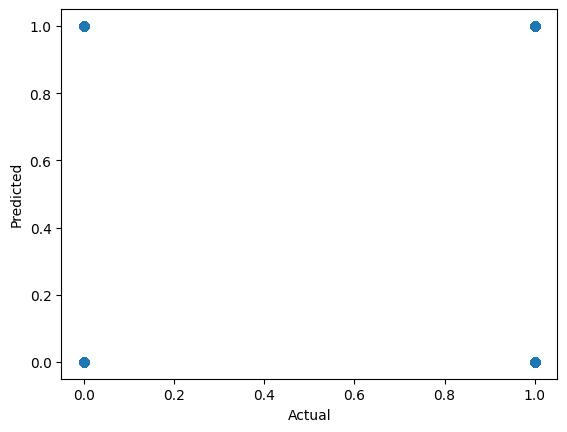

In [154]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

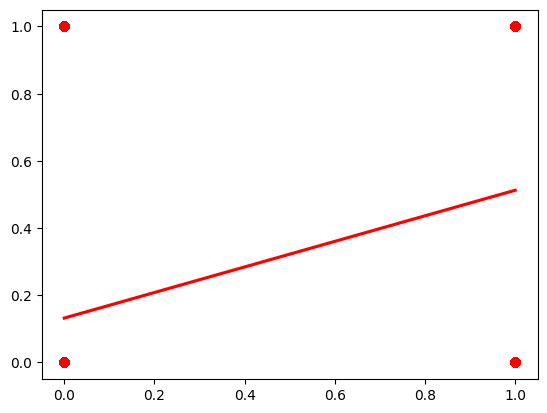

In [155]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [156]:
import pandas as pd

# Ensure y_test is a one-dimensional array
y_test_values = y_test.values.flatten() if isinstance(y_test, pd.DataFrame) else y_test.flatten()

# Ensure y_pred is a one-dimensional array
y_pred_values = y_pred.flatten() if isinstance(y_pred, pd.DataFrame) else y_pred.flatten()

# Create the DataFrame pred_df
pred_df = pd.DataFrame({'Actual Value': y_test_values, 'Predicted Value': y_pred_values, 'Difference': y_test_values - y_pred_values})

# Display pred_df
print(pred_df)

print("Shape of y_test:", y_test.shape)

      Actual Value  Predicted Value  Difference
0                1                0           1
1                0                1          -1
2                0                1          -1
3                0                0           0
4                1                0           1
...            ...              ...         ...
7639             1                1           0
7640             0                0           0
7641             0                0           0
7642             0                0           0
7643             1                0           1

[7644 rows x 3 columns]
Shape of y_test: (7644,)
